# Paquetes

Nueva funcionalidad en Julia se adquiere a través de *paquetes*, que son básicamente archivos de Julia que definen funciones nuevas.

El gestor de paquetes se llama `Pkg`. Conoce la ubicación de todos los paquetes ya registrados. Para actualizarlo hacemos:

In [ ]:
Pkg.update()

Para agregar un paquete nuevo, ponemos:

In [ ]:
Pkg.add("Interact")

En el caso de este paquete, cuyo nombre es  `Interact.jl`, resulta que para utilizarlo con IPython versión 3, es necesario usar la versión de desarrollo ("`master`") con

In [ ]:
Pkg.checkout("Interact")

# Interactividad

Cargamos el paquete `Interact.jl` con

In [1]:
using Interact

Esto hace disponible varios nombres, incluyendo `@manipulate`:

In [2]:
@manipulate for x in -3:0.1:3
    x^2
end

Slider{Float64}([Input{Float64}] 0.0,"x",0.0,-3.0:0.1:3.0)

0.0

In [3]:
f(x) = x^2

@manipulate for x in -3:0.1:3, y in -3:0.1:3
    f(x+y)
end

Slider{Float64}([Input{Float64}] 0.0,"x",0.0,-3.0:0.1:3.0)

Slider{Float64}([Input{Float64}] 0.0,"y",0.0,-3.0:0.1:3.0)

0.0

Nótese la sintaxis corta para dos bucles `for`.

# Interactuando con `PyPlot`

Ahora queremos poder interactuar con gráficas hechas con `PyPlot`. Resulta que tenemos que usar algo adicional: primero definir el objeto que represente la figura, y luego utilizar una sintaxis un poco rara. Pero con estos elementos debería funcionar:

In [ ]:
Pkg.add("PyPlot")

In [6]:
using PyPlot

Slider{Float64}([Input{Float64}] 0.0,"a",0.0,-2.0:0.1:2.0)

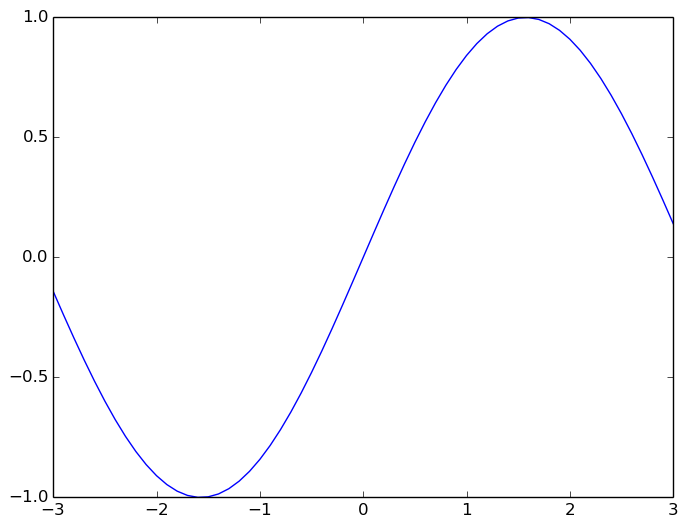

In [5]:
fig = figure()

@manipulate for a in -2:0.1:2
    withfig(fig) do
        x = -3:0.1:3
        plot(x, sin(x+a))
    end
end

(Nótese que nada de lo interactivo aparecerá en una versión estática de este notebook. Hay que correrlo de forma... ¡interactiva!)

In [ ]:
using Interact

Slider{Float64}([Input{Float64}] 0.0,"a",0.0,-2.0:0.1:2.0)

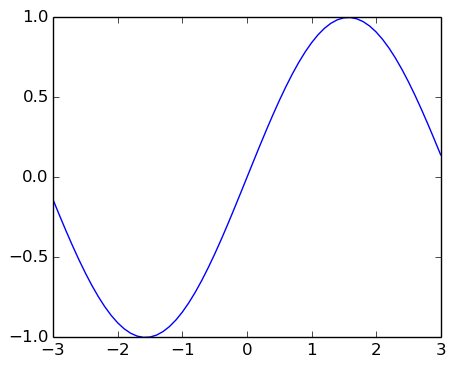

In [8]:
fig = figure(figsize=(5,4))

@manipulate for a in -2:0.1:2
    withfig(fig) do
        x = -3:0.1:3
        plot(x, sin(x+a))
    end
end

[1] Haz una gráfica interactiva de una cuadrática, en la cual puedes modificar todos los coeficientes.

[2] Haz lo mismo para una cuártica.

Se pueden hacer cosas más impresionantes; los siguientes ejemplos se tomaron de posts de Steven Johnson (autor de PyPlot) en los issues del paquete `Interact.jl` hace un par de semanas:

Slider{Float64}([Input{Float64}] 1.6,"\u3b1",1.6,0.2:0.1:3.0)

[Input{Float64}] 0.0
[Input{Float64}] -0.1
[Input{Float64}] -0.2
[Input{Float64}] -0.3
[Input{Float64}] -1.1
[Input{Float64}] -1.2


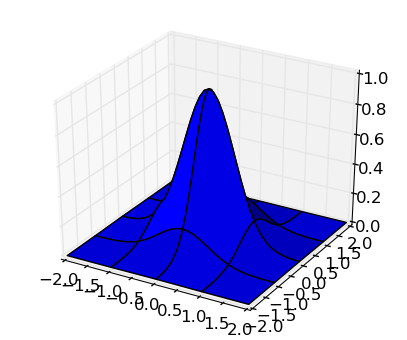

In [9]:
x = -2:0.1:2
y = -2:0.1:2
fig = figure(figsize=(5,4))
@manipulate for α=0.2:0.1:3 
    withfig(fig) do
        surf(x, y, exp(-α * (x.^2 .+ y'.^2)))
    end
end

Slider{Float64}([Input{Float64}] 2.0,"\u3b1",2.0,1.0:0.1:3.0)

Slider{Float64}([Input{Float64}] 2.0,"\u3b2",2.0,1.0:0.1:3.0)

Slider{Float64}([Input{Float64}] 2.0,"\u3b3",2.0,1.0:0.1:3.0)

Checkbox([Input{Bool}] false,"leg",false)

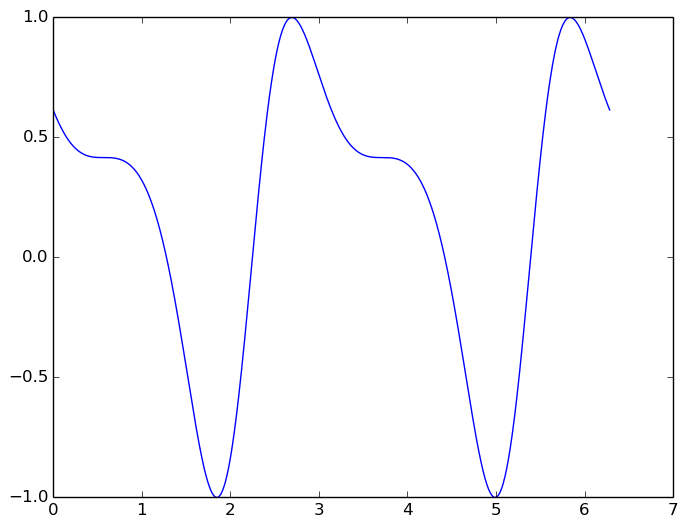

In [11]:
fig = figure()
x = linspace(0,2π,1000)
@manipulate for α=1:0.1:3, β=1:0.1:3, γ=1:0.1:3, leg=false
    withfig(fig) do
        plot(x, cos(α*x + sin(β*x + γ)))
        if leg
            legend(["a funny plot"])
        end
    end
end

# Gadfly

Otro paquete gráfico, muy avanzado y de otro tipo, nativo para Julia, se llama Gadfly:

In [ ]:
Pkg.add("Gadfly")
using Gadfly

In [ ]:
@manipulate for ϕ in 0:π/16:4π, f=["sin"=>sin, "cos"=>cos]
    Gadfly.plot(θ -> f(θ + ϕ), 0, 25)
end

La estructura

In [ ]:
d = ["sin"=>sin, "cos"=>cos]

se llama un *diccionario*; es un *arreglo associativo*, que asocia *valores* a *claves*. Es como un arreglo, perlo las claves pueden ser de *cualquier* tipo.